# Dignitas (KSE) PayPal Donations Analytics

In [3]:
import pandas as pd

df = pd.read_excel('./data/PayPal Donations All old account.xlsx', sheet_name='Sheet1',index_col=None, 
                   usecols = 'A, E, G, I, M')
df = df.fillna('Not specified')
df

,Date,Type,Gross,Net,Country
0,2023-02-27,General Payment,10.00,9.70,United States
1,2023-03-03,Mobile Payment,50.00,48.50,United States
2,2023-03-06,General Payment,25.00,24.25,United States
3,2023-03-09,General Payment,3399.03,3246.41,United Kingdom
4,2023-03-10,General Payment,10.11,10.11,Not specified
...,...,...,...,...,...
220,2023-05-10,Donation Payment,20.91,19.69,Israel
221,2023-05-12,Subscription Payment,15.00,13.99,Germany
222,2023-05-12,Mobile Payment,100.00,97.52,United States
223,2023-05-14,Subscription Payment,50.00,47.76,United Kingdom


In [4]:
df['Country'].value_counts()

United States     94
Germany           40
United Kingdom    14
Ukraine           11
Canada             9
Poland             8
Not specified      7
France             6
Spain              4
Switzerland        4
Israel             3
Denmark            3
Belgium            2
Austria            2
Italy              2
Finland            2
Japan              2
Cyprus             1
Ireland            1
Greece             1
Romania            1
Czech Republic     1
Hungary            1
Slovakia           1
Moldova            1
Australia          1
Netherlands        1
New Zealand        1
Sweden             1
Name: Country, dtype: int64

## Totally raised

In [5]:
'${:,.2f}'.format(df['Net'].sum())

'$29,847.98'

## Donation amount stats

In [6]:
#'${:,.2f}'.format(round(df['Net'].median(), 0))
round(df['Gross'].describe(), 0)

count     225.0
mean      137.0
std       302.0
min         1.0
25%        21.0
50%        52.0
75%       103.0
max      3399.0
Name: Gross, dtype: float64

In [15]:
from collections import Counter

most_common = pd.DataFrame(Counter(df['Net']).most_common(10), columns =['Amount', 'Frequency'])
most_common['Amount'] = round(most_common['Amount'] / 10)*10
most_common.groupby('Amount').sum().sort_values(by=['Frequency'], ascending = False)
#most_common[most_common['Amount']>0]

,Frequency
Amount,
100.0,32
50.0,28
10.0,14
20.0,9


## Median daily donation amount

In [16]:
'${:,.2f}'.format(round(df['Net'].groupby(df['Date'].dt.to_period('D')).sum().median(), 2))

'$173.86'

## Donations by date

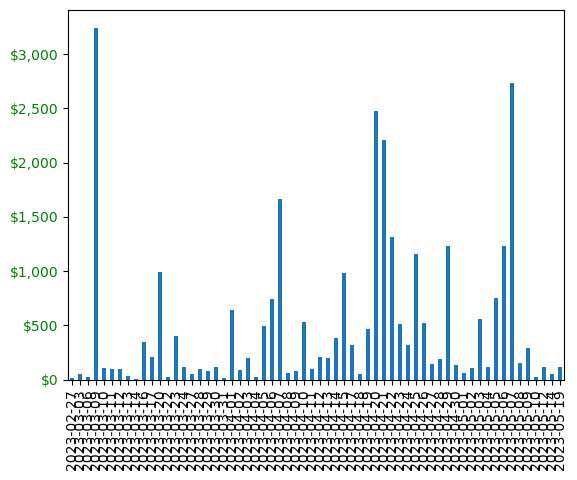

In [17]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
fig, ax = plt.subplots()


df['Net'].groupby(df['Date'].dt.to_period('D')).sum().plot(kind='bar', xlabel='')

# dollar ticks
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.yaxis.set_tick_params(which='major', labelcolor='green',
                         labelleft=True, labelright=False)
plt.show()

## Contributions by country

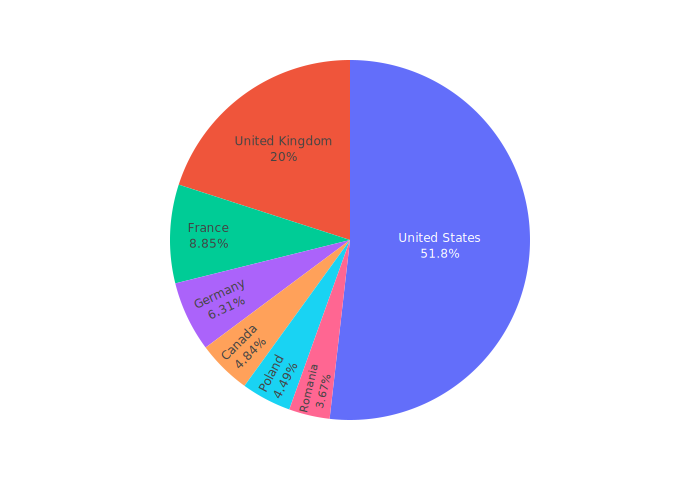

In [18]:
import plotly.io as pio
pio.renderers 
import plotly.express as px

df_country = df.groupby(df['Country'])['Net'].sum().sort_values(ascending=False).head(7).reset_index(name='Net')
fig = px.pie(df_country, values = 'Net', names = 'Country', labels = "Country")
fig.update_traces(textposition='inside', textinfo='percent+label', showlegend = False)
fig.show(renderer='svg')

## Weekly amounts

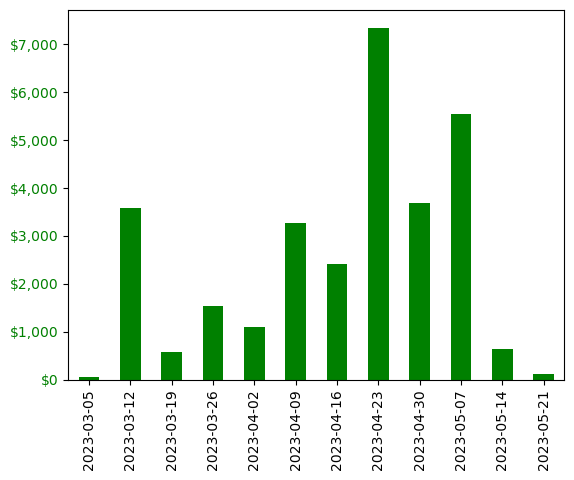

In [19]:
fig, ax = plt.subplots()
df_w = df.groupby([pd.Grouper(key='Date', freq='W')])['Net'].sum()

# remove time from datetime
df_w.index = df_w.index.date

# remove next mo data
#df_w = df_w[:-1]
df_w.plot(kind = 'bar', color = 'green')

# dollar ticks
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.yaxis.set_tick_params(which='major', labelcolor='green')
plt.show()

## Cumulatively raised

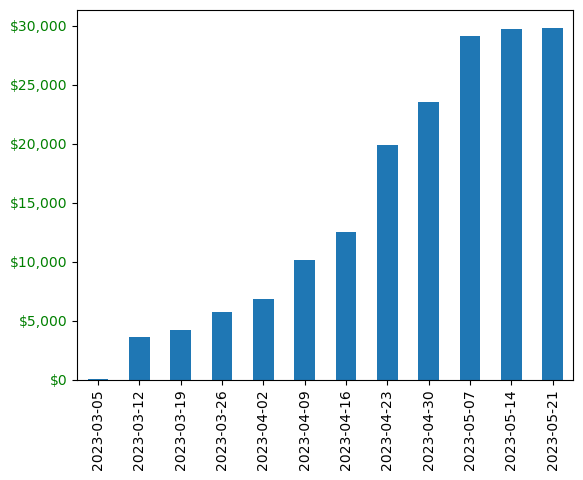

In [20]:
fig, ax = plt.subplots()

df_w.cumsum().plot(kind = 'bar')
# dollar ticks
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.yaxis.set_tick_params(which='major', labelcolor='green',
                         labelleft=True, labelright=False)
plt.show()

## We are all united

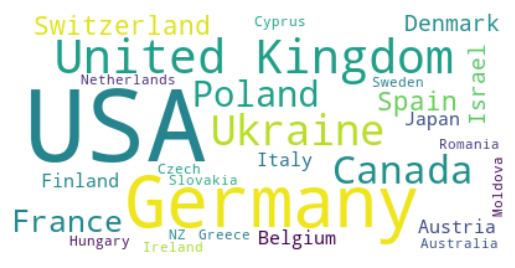

In [21]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

df['Country'] = df['Country'].replace(['United States'], 'USA')
df['Country'] = df['Country'].replace(['New Zealand'], 'NZ')
df['Country'] = df['Country'].replace(['Not specified'], '')
df['Country'] = df['Country'].replace(['Czech Republic'], 'Czech')

text = " ".join(i for i in df['Country'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
#plt.figure( figsize=(15,10))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Number of countries donations come from

In [22]:
df['Country'].nunique()

29

# And we have regular supporters with subscription amount

In [23]:
'${:,.2f}'.format(df.loc[df['Type'] == 'Subscription Payment', 'Net'].sum().round(2))


'$447.58'